In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import gc
import psutil
import random
import torch
import tensorflow as tf
import tensorflow.keras.backend as K
import tensorflow.keras.layers as layers
import tensorflow.keras.models as Models
from sklearn.model_selection import GroupKFold
from torch.utils.data import DataLoader,TensorDataset
from torch import Tensor
import warnings
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
#warnings.simplefilter(action='ignore',category=Warning)

In [2]:
def seed_everything(seed): 
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
seed_everything(42)

In [3]:
#import data_point
data_1=np.load('../input/sampling-points-50lakh/data_point_1.npy')
data_0=np.load('../input/sampling-points-50lakh/data_point_2.npy')
data_1=np.insert(data_1,8,1,axis=1)
data_0=np.insert(data_0,8,0,axis=1)
data_0=data_0[np.nonzero(~pd.DataFrame(data_0).isna()[0].values)]
train=np.append(data_1,data_0,axis=0)
np.random.shuffle(train)
del data_1,data_0

In [4]:
target=train[:,-1]
train=train[:,0:-1]

# LGB

In [5]:
# import lightgbm as lgb
# from sklearn.model_selection import StratifiedKFold
# fit_params = {
#     "num_boost_round": 100_000,
#     "early_stopping_rounds": 1000,
#     "verbose_eval": 50,
#                  }
# bst_params =  {
#                 'num_leaves': 350,
#                 'max_bin':700,
#                 'min_child_weight': 0.03454472573214212,
#                 'feature_fraction': 0.58,
#                 'bagging_fraction': 0.58,
#                 #'min_data_in_leaf': 106,
#                 'objective': 'binary',
#                 'max_depth': -1,
#                 'learning_rate': 0.05,
#                 "boosting_type": "gbdt",
#                 "bagging_seed": 11,
#                 "metric": 'auc',
#                 "verbosity": -1,
#                 'reg_alpha': 0.3899927210061127,
#                 'reg_lambda': 0.6485237330340494,
#                 'random_state': 47
#                 }

In [6]:
features=['Day_passed', 'timestamp_diff', 'Avg_prior_question_elapsed_time','Percent_of_student_Answered_Correctly','no_of_question_correct_answered', 'moving_explaination','no_of_question_answered', 'moving_average_index']

In [7]:
# lgb_model=[]
# skf=StratifiedKFold(n_splits=4, random_state=42, shuffle=True)
# fold=0
# for train_idx,val_idx in skf.split(train,target):
#     print('FOLDS:',fold+1)
    
#     train_set=lgb.Dataset( train[train_idx],label=target[train_idx])
#     val_set=lgb.Dataset(train[val_idx],label=target[val_idx])
    
#     model = lgb.train(bst_params,train_set=train_set,valid_sets=[train_set, val_set],
#                       valid_names=["train", "valid"],**fit_params,
#                       feature_name=features,)
#     lgb_model.append(model)
#     model.plot_importance(model, importance_type='gain')
#     plt.show()

In [8]:
# %%time
# def reduce_mem_usage(df, verbose=True):
#     numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#     start_mem = df.memory_usage().sum() / 1024**2    
#     for col in df.columns: #columns
#         col_type = df[col].dtypes
#         if col_type in numerics: #numerics
#             c_min = df[col].min()
#             c_max = df[col].max()
#             if str(col_type)[:3] == 'int':
#                 if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
#                     df[col] = df[col].astype(np.int8)
#                 elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
#                     df[col] = df[col].astype(np.int16)
#                 elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
#                     df[col] = df[col].astype(np.int32)
#                 elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
#                     df[col] = df[col].astype(np.int64)  
#             else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
#                 elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
#                     df[col] = df[col].astype(np.float32)
#                 else:
#                     df[col] = df[col].astype(np.float64)    
#     end_mem = df.memory_usage().sum() / 1024**2
#     if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
#     return df

# train=pd.read_csv('../input/final-preprocessing/train.csv')
# train=reduce_mem_usage(train, verbose=True)
# ############################################################
# moving_sum_prior_question_had_explaination=np.load('../input/final-preprocessing/moving_sum_prior_question_had_explaination.npy',allow_pickle=False)
# moving_average_index=np.load('../input/final-preprocessing/moving_Avg_prior_index.npy',allow_pickle=False)
# no_of_question_answered=np.load('../input/final-preprocessing/no_of_question_answered.npy',allow_pickle=False)
# no_of_question_correct_answered=np.load('../input/final-preprocessing/no_of_question_correct_answered.npy',allow_pickle=False)
# Percent_of_student_Answered_Correctly=np.load('../input/final-preprocessing/Percent_of_student_Answered_Correctly.npy',allow_pickle=False)
# Avg_prior_question_elapsed_time=np.load('../input/final-preprocessing/Avg_prior_question_elapsed_time.npy',allow_pickle=False)
# Day_passed=np.load('../input/final-preprocessing/Day_passed.npy',allow_pickle=False)
# timestamp_diff=np.load('../input/final-preprocessing/timestamp_diff.npy',allow_pickle=False)
# prior_question_elapsed_time=np.load('../input/final-preprocessing/prior_question_elapsed_time.npy',allow_pickle=False)
# ##################################################################
# temp=moving_average_index[train['answered_correctly'].values!=-1]
# moving_sum_prior_question_had_explaination=moving_sum_prior_question_had_explaination[temp!=-2]
# del temp
# ####################################################
# train_index=np.nonzero(moving_average_index>=0)[0]
# prior_question_elapsed_time=prior_question_elapsed_time[train_index]
# gc.collect()
# def mean_normalization(array):
#     global train_index
#     array=array[train_index]
#     mean=np.mean(array)
#     std= np.std(array)
#     array=(array-mean)/std
#     return array,mean,std

# def median_normalization(array):
#     global train_index
#     array=array[train_index].copy()
#     array=array[prior_question_elapsed_time!=prior_question_elapsed_time.max()]
#     median=np.median(array)
#     std=np.std(array)
#     array=(array-median)/(std)
#     return array,median,std
# def min_max(array):
#     global train_index
#     array=array[train_index].copy()
#     array=array[prior_question_elapsed_time!=prior_question_elapsed_time.max()]
#     Min=np.min(array)
#     Max=np.max(array)
#     array=(array-Min)/(Max-Min)
#     return array,Min,Max
# ###################################################
# train=train.loc[train_index].reset_index(drop=True)
# train=train.loc[prior_question_elapsed_time!=prior_question_elapsed_time.max()]
# #########################
# mean_std=[]
# Day_passed,mean,std=median_normalization(Day_passed)# Day passed is a counter features so median normlization is good. Median normalization is sugessted when there is equally space between them
# train['Day_passed']=Day_passed
# mean_std.append([train.columns[-1],mean,std])
# del Day_passed
# gc.collect()
# #########
# timestamp_diff,mean,std=median_normalization(timestamp_diff)# median normalization is robust to outlier
# train['timestamp_diff']=timestamp_diff
# mean_std.append([train.columns[-1],mean,std])
# del timestamp_diff
# gc.collect()
# ##########
# Avg_prior_question_elapsed_time,mean,std=mean_normalization(Avg_prior_question_elapsed_time)
# Avg_prior_question_elapsed_time=Avg_prior_question_elapsed_time[prior_question_elapsed_time!=prior_question_elapsed_time.max()]
# train['Avg_prior_question_elapsed_time']=Avg_prior_question_elapsed_time
# mean_std.append([train.columns[-1],mean,std])
# del Avg_prior_question_elapsed_time
# gc.collect()
# ##########
# Percent_of_student_Answered_Correctly=Percent_of_student_Answered_Correctly[train_index]
# Percent_of_student_Answered_Correctly=Percent_of_student_Answered_Correctly[prior_question_elapsed_time!=prior_question_elapsed_time.max()]
# train['Percent_of_student_Answered_Correctly']=Percent_of_student_Answered_Correctly/100
# mean_std.append([train.columns[-1],0,100])
# del Percent_of_student_Answered_Correctly
# gc.collect()
# #######
# no_of_question_correct_answered=no_of_question_correct_answered[train_index]/no_of_question_answered[train_index]
# no_of_question_correct_answered=no_of_question_correct_answered[prior_question_elapsed_time!=prior_question_elapsed_time.max()]
# train['no_of_question_correct_answered']=no_of_question_correct_answered
# mean_std.append([train.columns[-1],0,1])
# del no_of_question_correct_answered
# gc.collect()
# #####################
# moving_sum_prior_question_had_explaination=moving_sum_prior_question_had_explaination/no_of_question_answered[train_index]
# moving_sum_prior_question_had_explaination=moving_sum_prior_question_had_explaination[prior_question_elapsed_time!=prior_question_elapsed_time.max()]
# train['moving_explaination']=moving_sum_prior_question_had_explaination
# mean_std.append(['moving_explaination',0,1])
# del moving_sum_prior_question_had_explaination
# #####################
# no_of_question_answered,mean,std=median_normalization(no_of_question_answered)#counter vairable 
# train['no_of_question_answered']=no_of_question_answered
# mean_std.append([train.columns[-1],mean,std])
# del no_of_question_answered
# gc.collect()
# ####################
# moving_average_index,mean,std=min_max(moving_average_index)
# train['moving_average_index']=moving_average_index
# mean_std.append([train.columns[-1],mean,std])
# del moving_average_index
# ###################
# np.save('scaler.npy',mean_std)
# print(mean_std)
# del mean_std
# gc.collect()
# ################################
# print(train.memory_usage().sum() / 1024**2 )
# train=reduce_mem_usage(train, verbose=True)
# print(train.memory_usage().sum() / 1024**2 )
# del prior_question_elapsed_time
# #####################################
# target_=train['answered_correctly'].values
# train.drop(columns=['answered_correctly'],inplace=True)
# #user_id=train.user_id.values #3.1 GB Ram
# train.drop(columns=['user_id'],inplace=True)


# Neural Network

In [9]:
def plot_history(history):
    array=list(history.history.keys())
    score = history.history[array[1]]
    val_score = history.history[array[3]]

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(EPOCHS)

    # create subplots
    plt.figure(figsize = (20,5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, score, label = 'Training Score')
    plt.plot(epochs_range, val_score, label = 'Validation Score')
    plt.legend(loc = 'lower right')
    plt.title('Training and Validation Score')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label = 'Training Loss')
    plt.plot(epochs_range, val_loss, label = 'Validation Loss')
    # limit y-values for beter zoom-scale
    #plt.ylim(0.3 * np.mean(val_loss), 1.8 * np.mean(val_loss))

    plt.legend(loc = 'upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [10]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.val_score=[]
        
    def on_epoch_end(self, epoch, logs=None):
        #print(self.val_score)
        self.val_score.append(logs['val_loss'])
        if epoch % 10 == 0 or epoch == (EPOCHS -1 ):
            print(f"The average val-loss for epoch {epoch} is {logs['val_loss']:.2f}"
                  f" and the val-score is {logs['val_loss']}")

    def on_train_end(self, logs=None):
        best_epoch = np.argmin(self.val_score)
        # get score in best epoch
        best_score = self.val_score[best_epoch]
        print(f"Stop training, best model was found and saved in epoch {best_epoch + 1} with val-score: {best_score}."
              f" Final results in this fold (last epoch):") 

def get_checkpoint_saver_callback(fold):
    checkpt_saver = tf.keras.callbacks.ModelCheckpoint(
        'fold-%i.h5'%fold,
        monitor = 'val_loss',
        verbose = 0,
        save_best_only = True,
        save_weights_only = True,
        mode = 'min',
        save_freq = 'epoch')
    
    return checkpt_saver

In [11]:
EPOCHS = 100
BATCH_SIZE=2048#16384
Drop_1=0.395458
Drop_2=0.200271
Drop_3= 0.2#463196
FOLDS=7
Factor=0.8
lr=0.1#20555
patience=8

In [12]:
import tensorflow_addons as tfa
def model(Drop_1,Drop_2,Drop_3,lr=0.01,optimizer='Adam'):
    Input=layers.Input((8,))
    x=layers.BatchNormalization()(Input)
    x=tfa.layers.WeightNormalization(layers.Dense(128,activation='relu'))(x)
    x=layers.BatchNormalization()(x)
    x=layers.Dropout(0.2)(x)
    x=tfa.layers.WeightNormalization(layers.Dense(64,activation='relu'))(x)
    x=layers.BatchNormalization()(x)
    x=layers.Dropout(0.1)(x)
    x=tfa.layers.WeightNormalization(layers.Dense(32,activation='relu'))(x)
    x=layers.BatchNormalization()(x)
    x=layers.Dropout(0.1)(x)
    x=tfa.layers.WeightNormalization(layers.Dense(16,activation='relu'))(x)
    x=layers.BatchNormalization()(x)
    #x=layers.Dropout(0.1)(x)
    x=tfa.layers.WeightNormalization(layers.Dense(1,activation='sigmoid'))(x)
    model_neural=Models.Model(Input,x)
    
    ###################
    bce = tf.keras.losses.BinaryCrossentropy()
    optimizer=tf.keras.optimizers.Adam(lr=lr) if optimizer=='Adam' else tf.keras.optimizers.SGD()
    model_neural.compile(loss=bce,optimizer=optimizer,metrics=[tf.keras.metrics.AUC()])
    return model_neural

In [13]:
def train_model():
    FOLDS=3
    final_score=[]
    #print(BATCH_SIZE)
    for i in range(1):
        #group wise K-Fold 'user_id'
        callbacks=[]
        LOGGING=True
        skf=StratifiedKFold(n_splits=4, random_state=42, shuffle=True)
        fold=0
        OOF_val_score=[]
        for train_idx,val_idx in skf.split(train,target):
            gc.collect()
            gc.collect()
            gc.collect()
            fold+=1
            print(f"FOLD{fold}")
            #callbacks_lr = [get_lr_callback(BATCH_SIZE)]
            reduce_lr_loss=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=Factor,patience=patience,verbose = 1,epsilon = 1e-4,mode = 'min',min_lr = 0.00001)
            #reduce_lr_loss if the model reached to some plateau or loss is not decreasing then LR is reduced so that it won't overshoot#0.23889#50
            callbacks=[reduce_lr_loss]
            if(LOGGING==True):
                callbacks +=  [get_checkpoint_saver_callback(fold),                   
                             CustomCallback()]
                
            with tf.device("/gpu:0"):
                model_neural = model(Drop_1,Drop_2,Drop_3,lr,'Adam')
                history = model_neural.fit(train[train_idx], target[train_idx], 
                                           batch_size = BATCH_SIZE,epochs = EPOCHS,
                                           validation_data = (train[val_idx], target[val_idx]),
                                           callbacks = callbacks,verbose = 0)


            model_neural.load_weights('fold-%i.h5'%fold)
            print("Train:", model_neural.evaluate(train[train_idx], target[train_idx], verbose = 0, batch_size = BATCH_SIZE, return_dict = True))
            print("Val:", model_neural.evaluate(train[val_idx], target[val_idx], verbose = 0, batch_size = BATCH_SIZE, return_dict = True))
        
            gc.collect()
            gc.collect()
            gc.collect()
            score=model_neural.evaluate(train[val_idx], target[val_idx], verbose = 0, batch_size = BATCH_SIZE, return_dict = True)
            OOF_val_score.append(score[list(score.keys())[-1]])
            plot_history(history)
            #test_preds += model_neural.predict(X_test, batch_size = BATCH_SIZE, verbose = 0)/FOLDS
        print(np.mean(OOF_val_score))

FOLD1
The average val-loss for epoch 0 is 0.51 and the val-score is 0.5075849890708923
The average val-loss for epoch 10 is 0.50 and the val-score is 0.4952481687068939
The average val-loss for epoch 20 is 0.49 and the val-score is 0.4939396381378174

Epoch 00026: ReduceLROnPlateau reducing learning rate to 0.0800000011920929.
The average val-loss for epoch 30 is 0.49 and the val-score is 0.4915621280670166
The average val-loss for epoch 40 is 0.49 and the val-score is 0.49161434173583984
The average val-loss for epoch 50 is 0.49 and the val-score is 0.492570698261261

Epoch 00052: ReduceLROnPlateau reducing learning rate to 0.06399999856948853.

Epoch 00060: ReduceLROnPlateau reducing learning rate to 0.05119999647140503.
The average val-loss for epoch 60 is 0.49 and the val-score is 0.48922160267829895

Epoch 00071: ReduceLROnPlateau reducing learning rate to 0.04095999598503113.
The average val-loss for epoch 70 is 0.49 and the val-score is 0.4899166226387024
The average val-loss fo

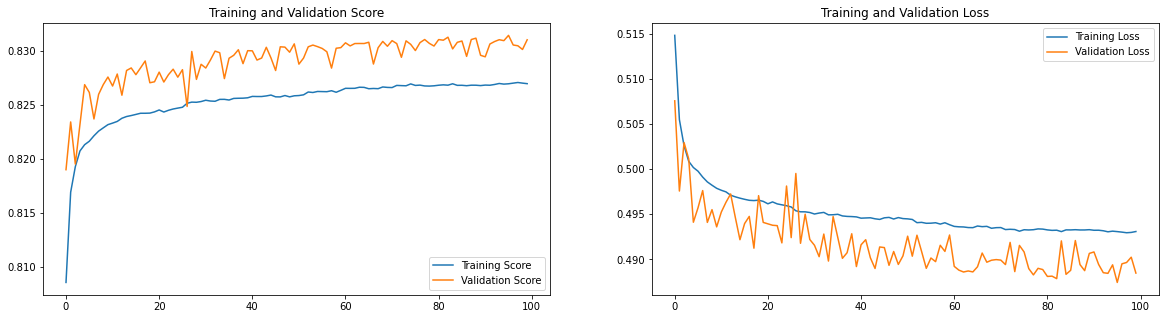

FOLD2
The average val-loss for epoch 0 is 0.51 and the val-score is 0.509958028793335
The average val-loss for epoch 10 is 0.50 and the val-score is 0.4966157078742981
The average val-loss for epoch 20 is 0.49 and the val-score is 0.4939846098423004
The average val-loss for epoch 30 is 0.49 and the val-score is 0.4940103590488434

Epoch 00033: ReduceLROnPlateau reducing learning rate to 0.0800000011920929.
The average val-loss for epoch 40 is 0.49 and the val-score is 0.4920825660228729

Epoch 00046: ReduceLROnPlateau reducing learning rate to 0.06399999856948853.
The average val-loss for epoch 50 is 0.49 and the val-score is 0.4894410967826843

Epoch 00054: ReduceLROnPlateau reducing learning rate to 0.05119999647140503.
The average val-loss for epoch 60 is 0.49 and the val-score is 0.48872849345207214
The average val-loss for epoch 70 is 0.49 and the val-score is 0.4877840578556061

Epoch 00075: ReduceLROnPlateau reducing learning rate to 0.04095999598503113.
The average val-loss for

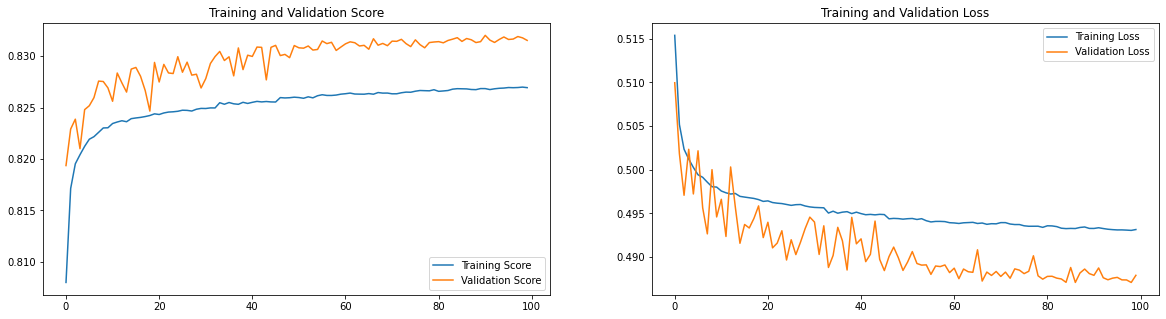

FOLD3
The average val-loss for epoch 0 is 0.50 and the val-score is 0.5015918612480164
The average val-loss for epoch 10 is 0.50 and the val-score is 0.5041073560714722
The average val-loss for epoch 20 is 0.50 and the val-score is 0.49752962589263916

Epoch 00028: ReduceLROnPlateau reducing learning rate to 0.0800000011920929.
The average val-loss for epoch 30 is 0.50 and the val-score is 0.4973677098751068

Epoch 00038: ReduceLROnPlateau reducing learning rate to 0.06399999856948853.
The average val-loss for epoch 40 is 0.49 and the val-score is 0.4928980767726898
The average val-loss for epoch 50 is 0.49 and the val-score is 0.4927479028701782

Epoch 00060: ReduceLROnPlateau reducing learning rate to 0.05119999647140503.
The average val-loss for epoch 60 is 0.49 and the val-score is 0.48884424567222595
The average val-loss for epoch 70 is 0.49 and the val-score is 0.48856353759765625

Epoch 00075: ReduceLROnPlateau reducing learning rate to 0.04095999598503113.
The average val-loss 

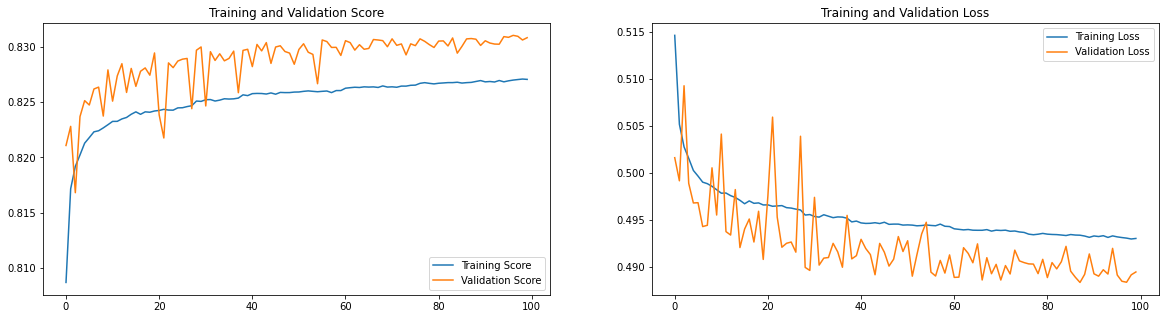

FOLD4
The average val-loss for epoch 0 is 0.50 and the val-score is 0.5017867684364319
The average val-loss for epoch 10 is 0.50 and the val-score is 0.496664434671402
The average val-loss for epoch 20 is 0.50 and the val-score is 0.49737969040870667

Epoch 00026: ReduceLROnPlateau reducing learning rate to 0.0800000011920929.
The average val-loss for epoch 30 is 0.49 and the val-score is 0.4896090626716614

Epoch 00036: ReduceLROnPlateau reducing learning rate to 0.06399999856948853.
The average val-loss for epoch 40 is 0.49 and the val-score is 0.4891536235809326
The average val-loss for epoch 50 is 0.49 and the val-score is 0.48932895064353943

Epoch 00057: ReduceLROnPlateau reducing learning rate to 0.05119999647140503.
The average val-loss for epoch 60 is 0.49 and the val-score is 0.4893763065338135

Epoch 00071: ReduceLROnPlateau reducing learning rate to 0.04095999598503113.
The average val-loss for epoch 70 is 0.49 and the val-score is 0.4880225956439972

Epoch 00079: ReduceLRO

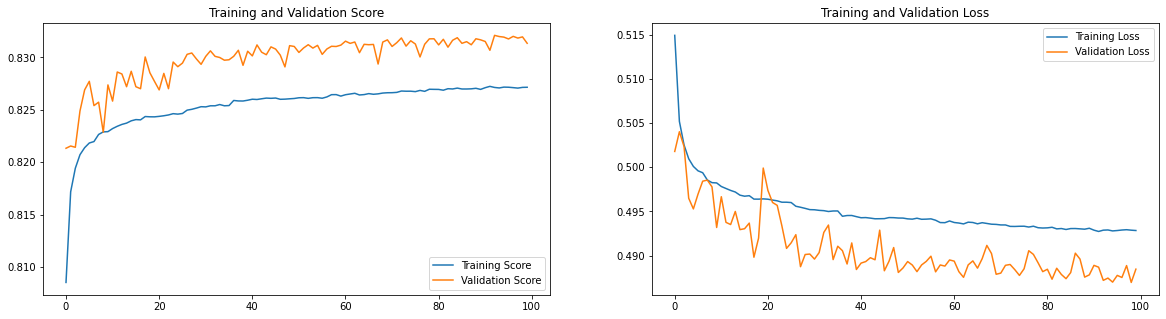

0.8314797133207321
CPU times: user 2h 11min 40s, sys: 15min 22s, total: 2h 27min 3s
Wall time: 1h 38min 56s


In [14]:
%%time
history=train_model()